<a href="https://colab.research.google.com/github/mbarragan744/clase-IA/blob/main/proyecto_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 9.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [ ]:
df=pd.read_csv(path+"/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

modelo supervisado-clasificacion

separar los features del label

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
#vamos a normalizar MinMax los features del dataframe X
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=df.columns[:-1])
X.var()

,0
Pregnancies,11.354056
Glucose,1022.248314
BloodPressure,374.647271
SkinThickness,254.473245
Insulin,13281.180078
BMI,62.159984
DiabetesPedigreeFunction,0.109779
Age,138.303046


In [ ]:
#USAR VirianceTrehold para eliminar los features que tengan las varianzas mas bajas <0.1
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.02)
X_clean=selector.fit_transform(X)
X_clean

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
selector.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [ ]:
print(selector.get_feature_names_out())

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [ ]:
X_clean=pd.DataFrame(X_clean, columns=selector.get_feature_names_out())
X_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


ahora que ya tuve la vista minable, coy a dividir los datos entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

<Axes: >

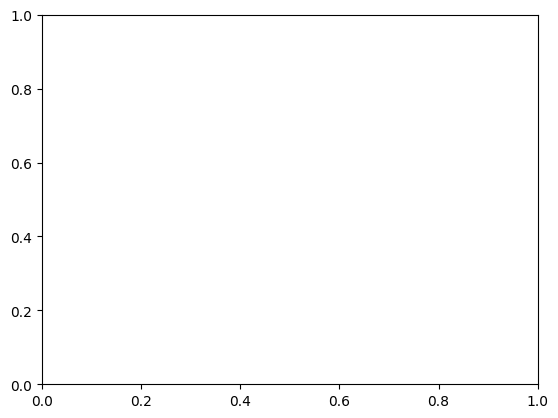

In [ ]:
sns.countplot(X=y_train)

In [ ]:
from imblearn.over_sampling import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


ImportError: cannot import name 'MinMaxScaler' from 'imblearn.over_sampling' (/usr/local/lib/python3.11/dist-packages/imblearn/over_sampling/__init__.py)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 258k/258k [00:00<00:00, 15.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


In [ ]:
import pandas as pd
df=pd.read_csv(path+"/global_air_quality_data_10000.csv")
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [ ]:
# prompt: #categorizar en una columna calidad del aire teniendo en cuenta que si PM2.5 es menor a 50 bueno, entre 51 y 100 es moderado, entre 101 y 150 es no sano para grupos sensibles, entre 151 y 200 es no sano, entre 201 y 300 es muy insano, y mas de 301 es peligroso

def categorize_air_quality(row):
  """Categorizes air quality based on PM2.5 levels."""
  pm25 = row['PM2.5']
  if pm25 < 50:
    return 'Bueno'
  elif 51 <= pm25 <= 100:
    return 'Moderado'
  elif 101 <= pm25 <= 150:
    return 'No sano para grupos sensibles'
  elif 151 <= pm25 <= 200:
    return 'No sano'
  elif 201 <= pm25 <= 300:
    return 'Muy insano'
  else:
    return 'Peligroso'


# Apply the function to create a new column 'Calidad del Aire'
df['Calidad del Aire'] = df.apply(categorize_air_quality, axis=1)


In [ ]:
df.head() # ya no es necesario PM2.5, CIUDAD Y PAIS, NI FECHA

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad del Aire
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,Moderado
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,Peligroso
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,No sano para grupos sensibles
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,No sano para grupos sensibles
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,Moderado


modelos: nayve bayes, suporvector machine, knn y arbol de decision
subirlo a github, el colab, y la aplicacion en streamlit

In [ ]:
# prompt: !python -V

!python --version


Python 3.11.11


DIABETES DATASET

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 7.76MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [2]:
import pandas as pd
df=pd.read_csv(path+"/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
